#  Clustering: KMeans
## HandWritting

### Preliminaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_digits
from sklearn.cluster import KMeans

In [2]:
digits = load_digits()
X = digits.data

### 1. Dimensionality reduction using PCA

Reduce each  8×8=64  dimensional image vectors to a vector of  𝑀  dimensions, where  𝑀<64.
For example, 𝑀=10

Questions: 
- Is neccesary to normalize these data?
- Complete the code to perform PCA

In [ ]:
# PCA (M=10)
# Answer: Add your own code here

pcaDD = PCA(n_components=10)

pcaDD.fit(X)

# X_projected = pcaDD.fit_transform(X)
X_projected = pcaDD.transform(X)

### 2. Kmeans clustering

- Perform the clustering for `K`=6 and `K`=10 (eventhough, we know that the number of clusters should be 10)

- Plot the data with each observation colored according to its cluster assignment by means scatter plots of the two first principal components

In [ ]:
# Kmeans K=6
# Answer: Add your own code here

kmeansDD_6 = KMeans(n_clusters=6, random_state=2, n_init=20).fit(X_projected)

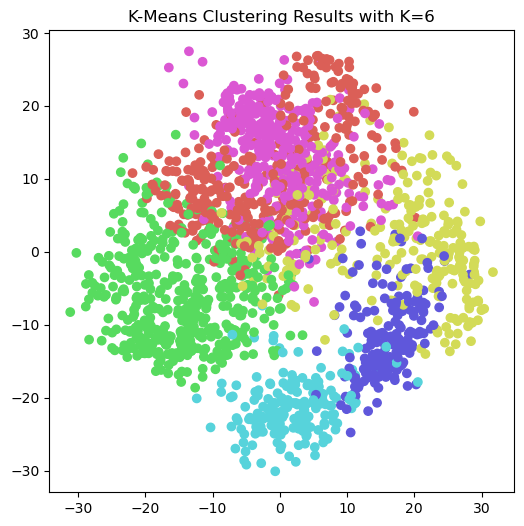

In [ ]:
# Scatter plots between the first two principal components
# Each observation colored according to its cluster label
# Answer: Add your own code here

palette = sns.color_palette("hls", n_colors=kmeansDD_6.n_clusters)
cluster_colors = [palette[label] for label in kmeansDD_6.labels_]

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(X_projected[:, 0], X_projected[:, 1], c=cluster_colors)
ax.set_title("K-Means Clustering Results with K=6");

In [ ]:
# Kmeans K=10
# Answer: Add your own code here
kmeansDD_10 = KMeans(n_clusters=10, random_state=2, n_init=50).fit(X_projected)

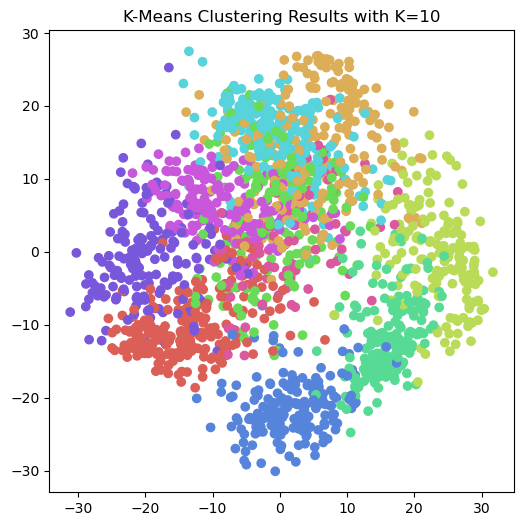

In [ ]:
# Scatter plots between the first two principal components
# Each observation colored according to its cluster label
# Answer: Add your own code here
palette = sns.color_palette("hls", n_colors=kmeansDD_10.n_clusters)
cluster_colors = [palette[label] for label in kmeansDD_10.labels_]

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(X_projected[:, 0], X_projected[:, 1], c=cluster_colors)
ax.set_title("K-Means Clustering Results with K=10");

### 3. Visualising the centroids in the original space (image vectors)

a) Centroids obtained from kmeans

b) Centroids calculated as the mean image vector within in each cluster 

a) Centroids obtained from kmeans

In [ ]:
# Centroids obteined from kmeans
# Answer: Add your own code here
centroids_reconstructed = pcaDD.inverse_transform(kmeansDD_10.cluster_centers_)

In [9]:
np.shape(centroids_reconstructed)

(10, 64)

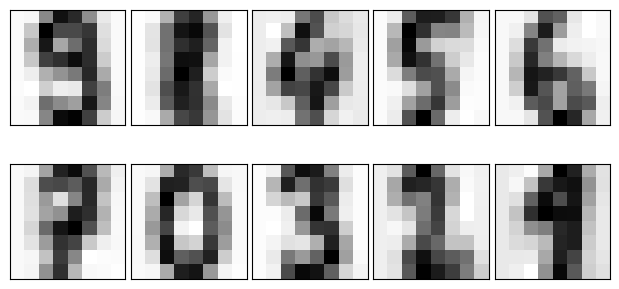

In [ ]:
# Centroids calculated as the mean image vector within in each cluster
# Answer: Add your own code here
fig = plt.figure(figsize=(6, 3))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(10):
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(centroids_reconstructed[i, :].reshape(8, 8), cmap=plt.cm.binary)

b) Centroids calculated as the mean image vector within in each cluster 

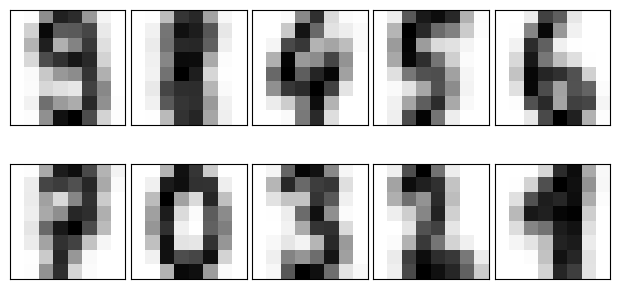

In [11]:
fig = plt.figure(figsize=(6, 3))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(kmeansDD_10.n_clusters):
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    centroids = np.mean(X[kmeansDD_10.labels_ == i], axis=0)
    ax.imshow(centroids.reshape(8, 8), cmap=plt.cm.binary)